In [155]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
%matplotlib inline

In [2]:
from scipy.io import loadmat

In [154]:
np

10

In [3]:
infile=loadmat('ex8_movies.mat')

In [4]:
infile.keys()

dict_keys(['__header__', '__version__', '__globals__', 'Y', 'R'])

In [5]:
Y=infile['Y'].copy()
R=infile['R'].copy()
Y.shape,R.shape

((1682, 943), (1682, 943))

In [13]:
infile2=loadmat('ex8_movieParams.mat')

In [14]:
infile2.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'Theta', 'num_users', 'num_movies', 'num_features'])

In [15]:
X=infile2['X'].copy()
theta=infile2['Theta'].copy()
X.shape,theta.shape

((1682, 10), (943, 10))

In [16]:
nm,nu=Y.shape

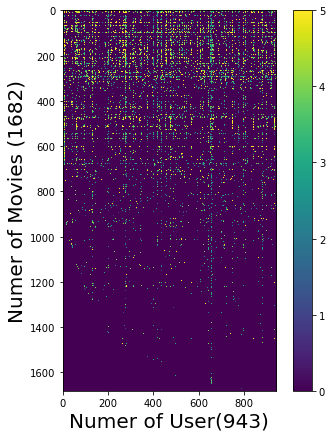

In [25]:
plt.figure(figsize=(6,7))
plt.imshow(Y)
plt.colorbar()
plt.ylabel('Numer of Movies (%d)'%nm,fontsize=20)
plt.xlabel('Numer of User(%d)'%nu,fontsize=20)

In [35]:
toy_story=[Y[0][i] for i in range(nu) if R[0][i]]
len(toy_story)
np.mean(toy_story)

3.8783185840707963

In [39]:
tmp=np.arange(9).reshape((3,3))
tmp.sum()

36

In [133]:
def flatten_para(X,theta):
    flattened_para=np.concatenate((X.flatten(),theta.flatten()))
    return flattened_para

In [215]:
def reshape_para(flattened,nu,nm,nf):
    assert flattened.size==(nu+nm)*nf
    X=flattened[:nm*nf].reshape((nm,nf))
    theta=flattened[nm*nf:].reshape((nu,nf))
    return X,theta

In [101]:
def cofi_cost(flattened,Y,R,nu,nm,np,lamb=0):
    X,theta=reshape_para(flattened,nu,nm,np)
    P=X.dot(theta.T)
    J=(0.5*((P-Y)*R)**2).sum()
    J += lamb/2*((X**2).sum())
    J += lamb/2*((theta**2).sum())
    return J
    

In [105]:
def cofi_grad(flattened,Y,R,nu,nm,np,lamb=0):
    X,theta=reshape_para(flattened,nu,nm,np)
    P=X.dot(theta.T)
    diff=(P-Y)*R
    X_grad=diff.dot(theta)+lamb*X
    theta_grad=diff.T.dot(X)+lamb*theta
    grad=flatten_para(X_grad,theta_grad)
    return grad
    

In [98]:
nu = 4; nm = 5; nf = 3
X = X[:nm,:nf]
theta = theta[:nu,:nf]
Y = Y[:nm,:nu]
R = R[:nm,:nu]

In [99]:
cofi_cost(flatten_para(X,theta),Y,R,4,5,3)

22.224603725685675

In [102]:
cofi_cost(flatten_para(X,theta),Y,R,4,5,3,1.5)

31.344056244274217

In [158]:
Y=infile['Y'].copy()
R=infile['R'].copy()
X=infile2['X'].copy()
theta=infile2['Theta'].copy()
nu=theta.shape[0]
nm=X.shape[0]
nf=10

In [159]:
flattened=flatten_para(X,theta)

In [164]:
def check_gradient(flattened,Y,R,nu,nm,nf,lamb=0):
    mygrad=cofi_grad(flattened,Y,R,nu,nm,nf,lamb)
    per=np.zeros_like(mygrad)
    epsi=0.001
    print('numerical gradient\t','analytical gradient')
    print('lambda:%0.2f'%lamb)
    for i in range(10):
        idx=np.random.randint(0,len(mygrad))
        per[idx]=epsi
        loss1=cofi_cost((flattened+per),Y,R,nu,nm,nf,lamb)
        loss2=cofi_cost((flattened-per),Y,R,nu,nm,nf,lamb)
        num_grad=(loss1-loss2)/(2*epsi)
        per[idx]=0
        print('%0.15f \t %0.15f'%(num_grad,mygrad[idx]))
        
    

In [165]:
check_gradient(flattened,Y,R,nu,nm,nf)

numerical gradient	 analytical gradient
lambda:0.00
1.002444969344651 	 1.002444970041925
3.335730236358359 	 3.335730231265136
-1.625103359401692 	 -1.625103360062845
2.474761797202518 	 2.474761797580314
-2.246862035462982 	 -2.246862034119117
-0.098237038400839 	 -0.098237038685895
5.575079669142724 	 5.575079670274105
-2.736190001087380 	 -2.736190001751819
4.672386325182742 	 4.672386326256796
3.326255013234913 	 3.326255009726378


In [166]:
check_gradient(flattened,Y,R,nu,nm,nf,lamb=1.5)

numerical gradient	 analytical gradient
lambda:1.50
2.112638918333687 	 2.112638920154128
2.098455264786026 	 2.098455262266419
1.498668018030003 	 1.498668014789024
0.900404975254787 	 0.900404975920694
0.091759189672302 	 0.091759196053513
-0.972865396761335 	 -0.972865395952882
1.682202815572964 	 1.682202815429470
-0.517181171744596 	 -0.517181173666536
-1.872934913990321 	 -1.872934912661983
-0.721992808394134 	 -0.721992811741424


In [108]:
np.random.randint(0,5)

0

In [167]:
movie=[]
with open('movie_ids.txt') as f:
    for line in f:
        movie.append(' '.join(line.strip('\n').split(' ')[1:]))

In [121]:
movie[0]

'Toy Story (1995)'

In [168]:
len(movie)

1682

In [170]:
my_ratings = np.zeros((1682,1))
my_ratings[0]   = 4
my_ratings[97]  = 2
my_ratings[6]   = 3
my_ratings[11]  = 5
my_ratings[53]  = 4
my_ratings[63]  = 5
my_ratings[65]  = 3
my_ratings[68]  = 5
my_ratings[182] = 4
my_ratings[225] = 5
my_ratings[354] = 5

In [171]:
my_ratings.shape

(1682, 1)

In [172]:
X.shape

(1682, 10)

In [176]:
theta.shape

(943, 10)

In [269]:
Y_new=np.hstack((Y,my_ratings))

In [270]:
Y_new.shape

(1682, 944)

In [271]:
(my_ratings!=0).shape

(1682, 1)

In [272]:
R_new=np.hstack((R,my_ratings!=0))

In [273]:
R_new.shape

(1682, 944)

In [274]:
nm,nu=Y_new.shape

In [275]:
def nomalize_mean(myY,myR):
    mymean=np.sum(myY,axis=1)/np.sum(myR,axis=1)
    mymean=mymean.reshape((myY.shape[0],1))
    return myY-mymean,mymean

In [192]:
tmp1,tmp2=nomalize_mean(Y_new,R_new)

In [196]:
np.sum(tmp1,axis=1).shape

(1682,)

In [194]:
tmp2.shape

(1682, 1)

In [276]:
Y2,Y_mean=nomalize_mean(Y_new,R_new)

In [216]:
nf

10

In [209]:
X_ini=np.random.rand(nm,nf)
theta_init=np.random.rand(nu,nf)
para_flat=flatten_para(X_ini,theta_init)

In [278]:
results=minimize(cofi_cost,para_flat,method='CG',args=(Y_new,R_new,nu,nm,nf,10),jac=cofi_grad)

In [279]:
results.x.shape

(26260,)

In [280]:
X_pred,theta_pred=reshape_para(results.x,nu,nm,nf)

In [281]:
X_pred.shape

(1682, 10)

In [282]:
theta_pred.shape

(944, 10)

In [283]:
theta.shape

(943, 10)

In [284]:
Y_pred=X_pred.dot(theta_pred.T)

In [285]:
my_pred=Y_pred[:,-1]

In [286]:
my_pred=my_pred.reshape((1682,1))+Y_mean

In [287]:
Y_mean.shape

(1682, 1)

In [288]:
my_pred

array([[ 7.38313543],
       [ 5.81563331],
       [ 5.41874226],
       ..., 
       [ 2.38316618],
       [ 3.59130394],
       [ 3.57186498]])

In [289]:
my_mov=np.argsort(my_pred.flatten())

In [290]:
my_mov=my_mov[::-1]

In [293]:
for i in range(10):
    print(movie[my_mov[i]],my_pred[my_mov[i]])

Star Wars (1977) [ 8.60946001]
Titanic (1997) [ 8.49002635]
Shawshank Redemption, The (1994) [ 8.36622675]
Raiders of the Lost Ark (1981) [ 8.26295527]
Schindler's List (1993) [ 8.24144421]
Good Will Hunting (1997) [ 8.17856842]
Empire Strikes Back, The (1980) [ 8.14242126]
Godfather, The (1972) [ 8.09712374]
Usual Suspects, The (1995) [ 8.07786384]
Braveheart (1995) [ 8.04061133]
